# [Genieclust](https://github.com/gagolews/genieclust) Tutorial
## The Genie Algorithm with Noise Points Detection

a.k.a. HDBSCAN* with the Genie correction

> **It is a draft version of the tutorial distributed in the hope that it will be useful.**


Author: [Marek Gagolewski](http://www.gagolewski.com)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import genieclust

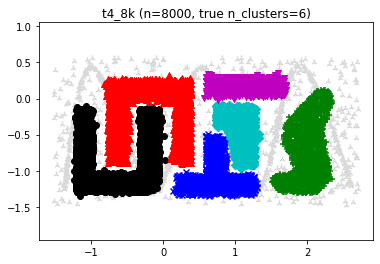

In [2]:
path = os.path.join("..", "benchmark_data")
dataset = "t4_8k"

# Load an example 2D dataset
X = np.loadtxt("%s/%s.data.gz" % (path,dataset), ndmin=2)

# Load the corresponding reference labels.
# The original labels are in {1,2,..,k} and 0 denotes the noise cluster.
# Let's make them more Python-ish by subtracting 1 (and hence the noise cluster will be marked as -1).
labels_true = np.loadtxt("%s/%s.labels0.gz" % (path,dataset), dtype=np.intp)-1
n_clusters = len(np.unique(labels_true))-(np.min(labels_true)==-1) # do not count the "noise" cluster (if present) as a separate entity

# Center and scale (proportionally in all the axes) all the points.
# Note: this is NOT a standardization of all the variables.
X = (X-np.mean(X))/np.std(X, ddof=1)

# Plot the dataset
genieclust.plots.plot_scatter(X, labels_true)
plt.title("%s (n=%d, true n_clusters=%d)"%(dataset, X.shape[0], n_clusters))
plt.axis("equal")
plt.show()

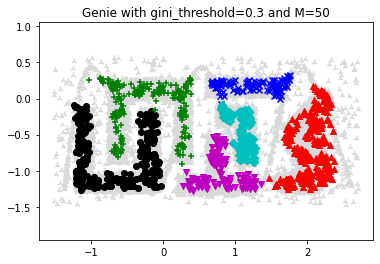

Genie(M=50, allow_cast_float32=True, exact=True, gini_threshold=0.3,
      n_clusters=6, n_neighbors=-1, nn_params=None, postprocess='none')


In [3]:
g = genieclust.genie.Genie(n_clusters=n_clusters, M=50, postprocess='none')
labels_genie2 = g.fit_predict(X)
genieclust.plots.plot_scatter(X, labels_genie2)
plt.title("Genie with gini_threshold=%g and M=%d"%(g.gini_threshold, g.M))
plt.axis("equal")
plt.show()
print(g)

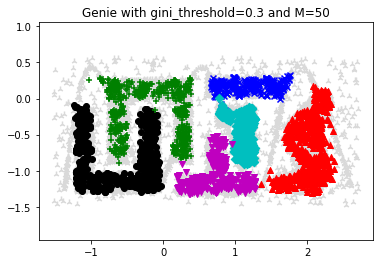

Genie(M=50, allow_cast_float32=True, exact=True, gini_threshold=0.3,
      n_clusters=6, n_neighbors=-1, nn_params=None, postprocess='boundary')
non-noise points=2654, of which 1528 generated in the postprocessing step


In [4]:
g = genieclust.genie.Genie(n_clusters=n_clusters, M=50) # default postprocess='boundary'
labels_genie = g.fit_predict(X)
genieclust.plots.plot_scatter(X, labels_genie)
plt.title("Genie with gini_threshold=%g and M=%d"%(g.gini_threshold, g.M))
plt.axis("equal")
plt.show()
print(g)
print("non-noise points=%d, of which %d generated in the postprocessing step" %((labels_genie>=0).sum(), (labels_genie>=0).sum()-(labels_genie2>=0).sum())) 

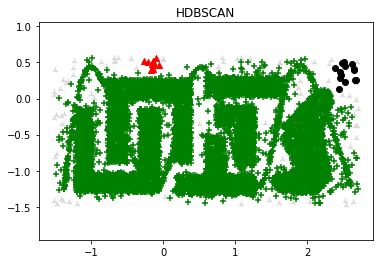

In [5]:
import hdbscan
h = hdbscan.HDBSCAN()
labels_hdbscan = h.fit_predict(X)
genieclust.plots.plot_scatter(X, labels_hdbscan)
plt.title("HDBSCAN")
plt.axis("equal")
plt.show()

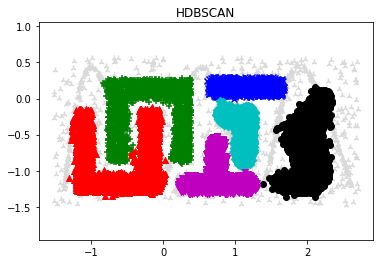

In [6]:
import hdbscan
h = hdbscan.HDBSCAN(min_cluster_size=50)
labels_hdbscan = h.fit_predict(X)
genieclust.plots.plot_scatter(X, labels_hdbscan)
plt.title("HDBSCAN")
plt.axis("equal")
plt.show()